In [ ]:
pip install deap

     |████████████████████████████████| 163kB 14.1MB/s 


In [ ]:
#Importamos las librerías y dependencias
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt
from matplotlib import cm

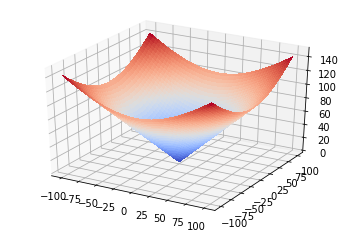

In [ ]:
Xg = np.linspace(-100,100,200)
Yg = np.linspace(-100,100,200)
Xg, Yg = np.meshgrid(Xg,Yg)
Zg = np.sqrt(Xg**2 + Yg**2)

fig = plt.figure()
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(Xg,Yg,Zg, cmap=cm.coolwarm,linewidth = 0, antialiased = False )
ax.set_zlim(0,150)
plt.show()

In [ ]:
# se crean los objetos para maximizar o minimizar
creator.create("FitnessMax", base.Fitness, weights = (1.0,))
creator.create("Individuo", list, fitness=creator.FitnessMax)

#creator.create("FitnessMin", base.Fitness, weights = (-1.0,))
#creator.create("Individuo", list, fitness=creator.FitnessMin)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [ ]:
#Se define la función objetivo
def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(x)):
        if x[i] > 100 or x[i] < -100:
            return -1,
    res = math.sqrt(x[0]**2 + x[1]**2)        
    return res,

In [ ]:
toolbox = base.Toolbox()
# Generación de genes 
toolbox.register("attr_uniform", random.uniform, -100, 100)
# Generación del inviduo, 
# La cantidad de posiciones del individuo determina la cantidad de variables a trabajar
toolbox.register("individuo", tools.initRepeat, creator.Individuo, 
                 toolbox.attr_uniform, 2)
# Generación de la población
toolbox.register("poblacion", tools.initRepeat, list, 
                 toolbox.individuo, 20)

In [ ]:
# Registro de operaciones genéticas
# Parece que los nombres no se pueden modificar
toolbox.register("evaluate", funcion_objetivo)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, 
                 sigma= 5, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

In [ ]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")
    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    ax1.fill_between(gen, fit_mins, fit_maxs, 
                     where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generacion")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 160])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


gen	nevals	avg    	std    	min    	max    
0  	20    	79.4371	20.4079	50.4861	118.148
1  	16    	95.9929	22.3408	46.9861	127.707
2  	13    	113.587	14.1127	76.8312	135.103
3  	14    	126.756	7.45138	118.148	135.103
4  	17    	132.274	5.19054	113.604	135.103
5  	11    	134.965	0.412979	133.726	135.103
6  	14    	134.864	1.03959 	130.333	135.103
7  	15    	134.866	0.712281	132.538	135.103
8  	12    	135.103	2.84217e-14	135.103	135.103
9  	17    	134.988	0.497374   	132.82 	135.103
10 	18    	128.297	29.6629    	-1     	135.103
11 	17    	128.119	29.6292    	-1     	135.103
12 	16    	135.103	2.84217e-14	135.103	135.103
13 	19    	135.061	0.154597   	134.398	135.103
14 	15    	135.075	0.119107   	134.556	135.103
15 	18    	135.103	2.84217e-14	135.103	135.103
16 	12    	135.103	2.84217e-14	135.103	135.103
17 	12    	128.297	29.6629    	-1     	135.103
18 	15    	135.103	2.84217e-14	135.103	135.103
19 	14    	135.103	2.84217e-14	135.103	135.103
20 	17    	134.801	2.07399    	127.606	139.746

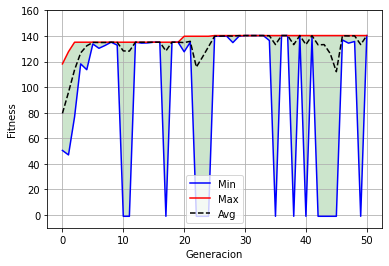

In [ ]:
# Función principal
#random.seed(42)
# Configuración de los parámetros del AG
CXPB, MUTPB, NGEN = 0.7, 0.2, 50
pop = toolbox.poblacion() 
hof = tools.HallOfFame(1) 
stats = tools.Statistics(lambda ind: ind.fitness.values) 
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
logbook = tools.Logbook()
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, 
                                       mutpb=MUTPB, ngen=NGEN, stats=stats, 
                                       halloffame=hof, verbose=True)
#    return hof, logbook 
#best, log = main()
print("Mejor fitness: %f" %hof[0].fitness.values)
print("Mejor individuo %s" %hof[0])
plot_evolucion(logbook)